In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

## Chargement des données

In [16]:
requests=pd.read_csv("data.csv",sep=",",header=0)
requests.index=requests['hotel_id']
requests=requests.drop(['hotel_id'],axis=1)
requests.head()

,group,brand,city,parking,pool,children_policy,price,stock,date,language,mobile,avatar_name
hotel_id,,,,,,,,,,,,
917,Morriott International,Corlton,amsterdam,1,1,0,366,14,10,austrian,0,laulau
101,Accar Hotels,Safitel,amsterdam,1,0,0,359,10,10,austrian,0,laulau
762,Yin Yang,Ardisson,amsterdam,1,1,0,193,10,10,austrian,0,laulau
140,Boss Western,Boss Western,amsterdam,0,0,0,205,4,10,austrian,0,laulau
256,Accar Hotels,Ibas,amsterdam,1,0,0,86,0,10,austrian,0,laulau


In [17]:
#on transforme les variables en facteur
requests=pd.get_dummies(requests, columns=['group'])
requests=pd.get_dummies(requests, columns=['city'])
requests=pd.get_dummies(requests, columns=['brand'])
requests=pd.get_dummies(requests, columns=['language'])
requests=requests.drop(['avatar_name'], axis=1)

# Création de l'échantillon d'apprentissage et de l'échantillon test

In [ ]:
price=requests["price"]
X_train,X_test,price_train,price_test=train_test_split(requests,price,test_size=0.25,random_state=11)
X_train=X_train.drop(['price'], axis=1)
X_test=X_test.drop(['price'], axis=1)

#### On définit le MAPE

In [30]:
# On définit la fonction MAPE : Mean Absolute Percentage Error
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

# Random Forests

In [23]:
rf= RandomForestRegressor(n_estimators=400,max_features=2)
rfFit=rf.fit(X_train, price_train)
# Importance décroissante des variables
feature_importance_df = pd.DataFrame({
    'Feature' : X_train.columns,
    'Importance' : rfFit.feature_importances_
}).sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
3,stock,0.106285
35,brand_Safitel,0.091031
1,pool,0.083255
28,brand_Independant,0.071814
25,brand_Corlton,0.066870
...,...,...
51,language_irish,0.000338
49,language_greek,0.000335
37,language_austrian,0.000330
56,language_polish,0.000322


In [32]:
#optimisation des paramètres
param=[{"n_estimators":list(range(50,200,50)),"max_features":list(range(2,5,1)) }]
n_features = np.shape(X_train)[1]
rf= GridSearchCV(RandomForestRegressor(),
        param,cv=10,n_jobs=-1)
rfOpt=rf.fit(X_train, price_train)

# paramètre optimal
print("Meilleur score = %f, Meilleur paramètre = %s" % (1. - rfOpt.best_score_,rfOpt.best_params_))

KeyboardInterrupt: 

<AxesSubplot:title={'center':'Feature Importance'}, xlabel='Importance', ylabel='Feature'>

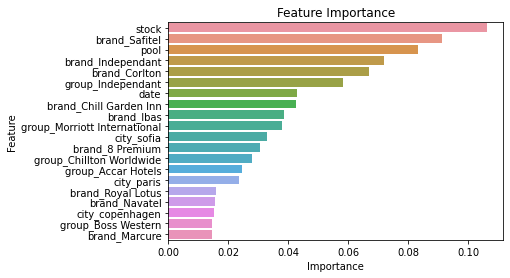

In [25]:
plt.title('Feature Importance')
sns.barplot(data = feature_importance_df.head(20), x='Importance', y='Feature')

## Prédictions

In [26]:
predictions = rf.predict(X_test)

In [31]:
#Calcul de la valeur absolue des erreurs
print("MSE=",mean_squared_error(price_test,predictions))
print("R2=",r2_score(price_test,predictions))
print("MAPE=",MAPE(price_test,predictions))

MSE= 273.025684552455
R2= 0.9629305952330668
MAPE= 6.883209656424167


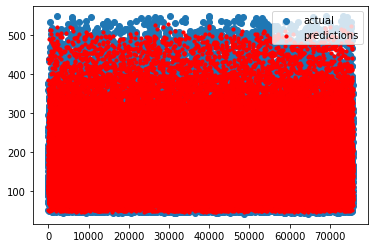

In [28]:
x = np.linspace(1,np.shape(price_test)[0],np.shape(price_test)[0])
plt.scatter(x,price_test,label='actual')
plt.scatter(x,predictions,s=10,c='red',label='predictions')
plt.legend()

## Interprétabilité